### Treść zadania

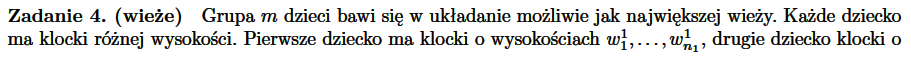
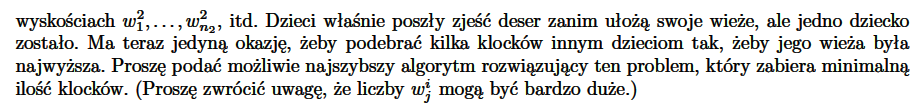

###### UWAGA:
Indeksy górne przy wysokościach klocków symbolizują jedynie to, do którego dziecka należy dany klocek. Nie oznaczają one potęgowania.

### Omówienie algorytmu

##### Przykład:

Aby łatwiej było zrozumieć działanie algorytmu, spójrzmy na poniższą ilustrację, przedstawiającą kolejne kroki algorytmu (czytamy od lewej do prawej, z góry na dół). Tak więc, pierwsza u góry po lewej stronie ilustracja odpowiada pierwszemu wyborowi kolcka, natomiast ilustracja w prawym dolnym rogu odpowiada końcowemu podziałowi klocków. Pięć pierwszych wież symbolizuje najwyższe wieże, jakie może zbudować piątka dzieci, które poszły na deser (wieże jeszcze nie są naprawdę zbudowane, o czym świadczy polecenie, ale tak łatwiej jest nam zilustrować, jak wysokie wieże mogą powstać, przy pomocy klocków, jakie mają te dzieci), natomiast najbardziej wysunięta w prawą stronę wieża jest wieżą, jaką buduje niegrzeczne dziecko (czerwone klocki to jego początkowe klocki, a kolejne klocki innych kolorów są klockami podebranymi od innych dzieci).

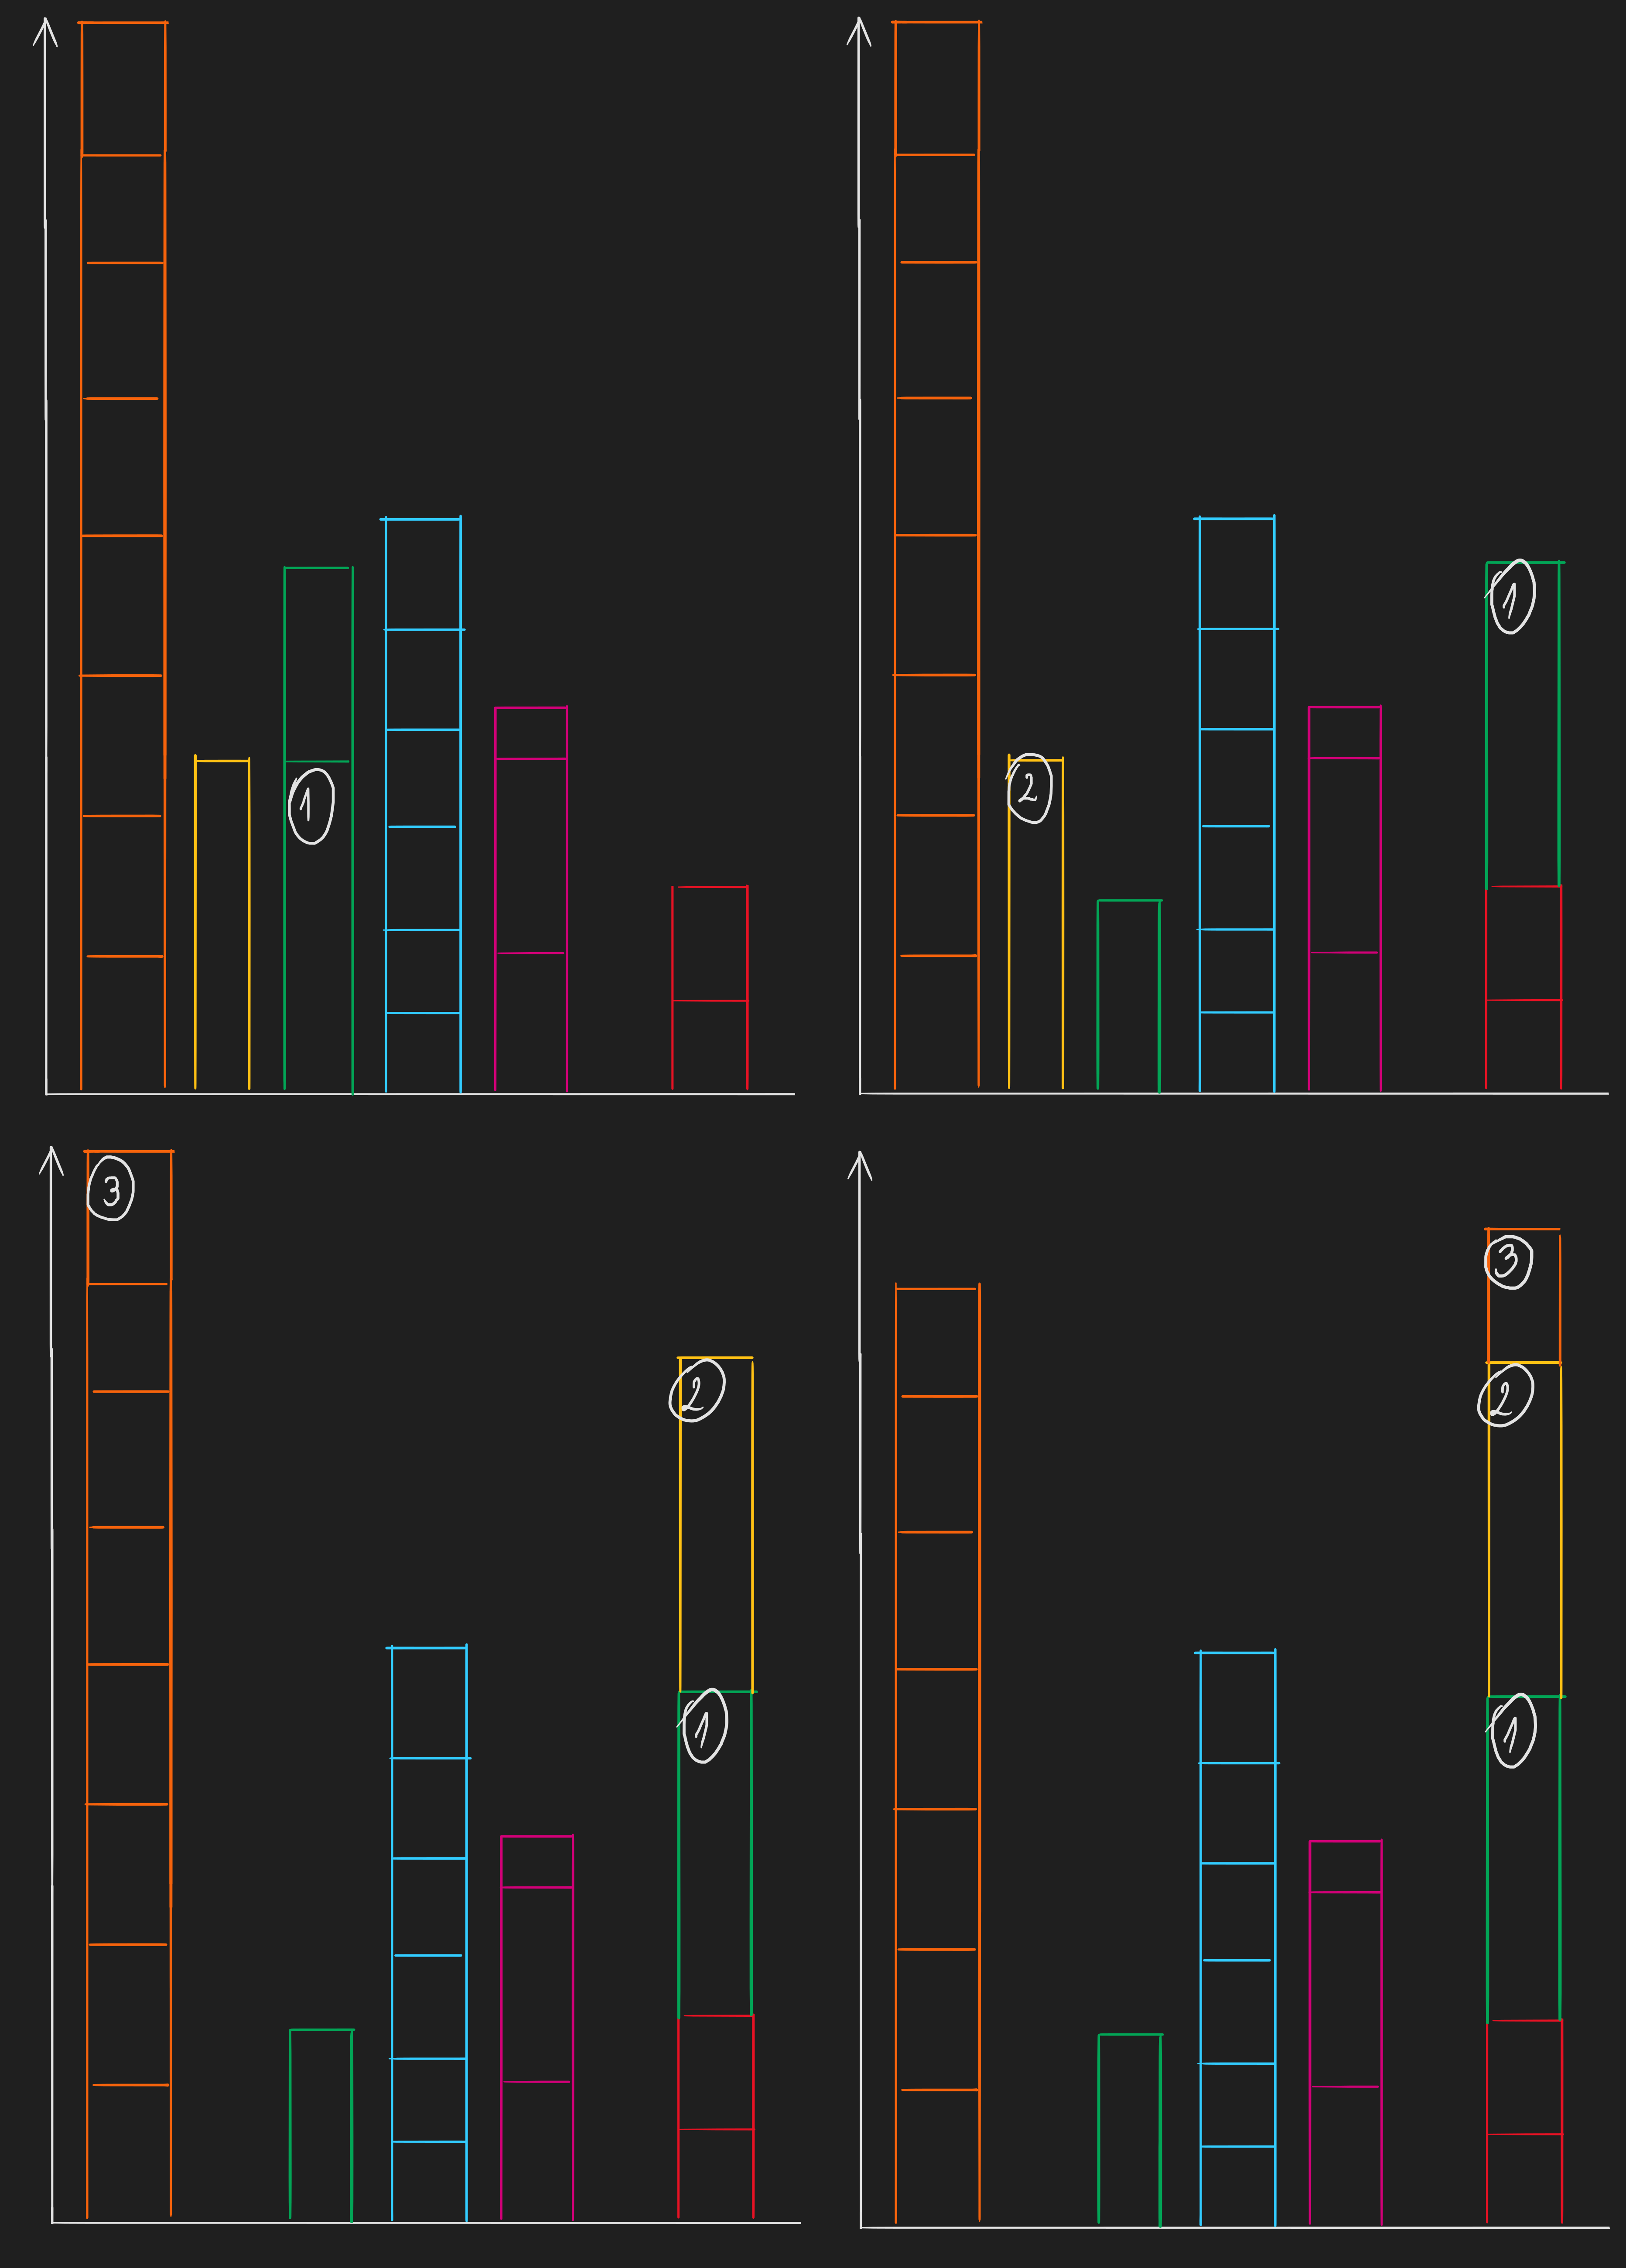

##### Właściwe omówienie algorytmu:

Ponieważ jest to algorytm zachłanny, musimy za każdym razem podejmować taką decyzję, która przybliża nas do osiągnięcia celu, a więc do uzyskania najwyższej wieży ze wszystkich osób. W tym miejscu warto przybliżyć 2 obserwacje, które można zauważyć, na podstawie powyższego przykładu:
- jeżeli bierzemy klocek z jakiejś wieży (tak naprawdę z zestawu klocków innego dziecka, przeznaczonych na wybudowanie wieży), to zawsze bierzemy największy klocek z tego zestawu,
- wybieramy zawsze taki zestaw klocków, z którego będziemy kraść największy klocek, dla którego zabranie największego klocka, spowoduje największe przybliżenie nas do posiadania najwyższej wieży (stąd wynikają 2 poniższe podpunkty),
- jeżeli bierzemy klocek spośród zestawu klocków dziecka, którego wieża będzie najwyższa, musimy rozważyć to, czy po zabraniu tego klocka nadal ta wieża będzie najwyższa (tzn. ponieważ bierzemy z najwyższej wieży, dotychczas najwyższa wieża może przestać być najwyższą). W takiej sytuacji konieczne jest sprawdzenie jednej następnej w kolejności po najwyższej wieży, która ma szansę stać się najwyższą wieżą,
- natomiast, jeżeli bierzemy z wieży innej niż najwyższa (możemy nawet brać z najniższej, jeżeli np. składa się ona tylko z jednego klocka, ale klocek ten jest najwyższym klockiem ze wszystkich i jego wzięcie przybliży nas najbardziej do osiągnięcia najwyższej wieży), nie musimy już badać, jaka będzie wysokość nowej najwyższej wieży, bo najwyższa wieża pozostanie niezmieniona.

<br><br>
Na podstawie powyższych obserwacji, możemy wysunąć następujące wnioski:
- Jeżeli bierzemy klocek z danej wieży, to zawsze największy $\rightarrow$ potrzebujemy przechowywać klocki każdej z wież w kopcu Max Heap (albo sortujemy i ściągamy zawsze największy, ale wolę kopiec),
- Jeżeli sprawdzamy, z której wieży wziąć klocek, to startujemy od wieży najwyższej i zawsze w kolejnych krokach przechodzimy do wież kolejno niższych (istnieje największa szansa, że jeżeli zmniejszymy wysokość najwyższej wieży, nawet, jeżeli będzie składała się ona z mniejszych klocków niż inne wieże, szybciej osiągniemy cel niż dobierając duże klocki z mniejszych wież. Poza tym, jeżeli wśród innych wież znajduje się kilka klocków o tej samej wysokości, bardziej opłaca nam się wziąć ten klocek z wieży wyższej, która potencjalnie może się stać wieżą najwyższą, po wzięciu w którejś kolejnej iteracji klocka z najwyższej obecnie wieży). W skrócie, jeżeli wzięcie klocka z kilku wież przybliża nas w takim samym stopniu do wygrania, bierzemy najpierw z wyższych wież $\rightarrow$ potrzebujemy przechowywać wszystkie wieże posortowane według wysokości (nie wystarczy już kopiec, bo zawsze chcemy sprawdzać kolejno wieże nie wyższe niż poprzednie),
- Jeżeli zabieramy klocek z jakiejś wieży, musimy zaktualizować jej wysokość, przez co zmianie ulega wzajemna kolejność wież (tzn. zmniejsza się wysokość wieży, więc staje się ona dla nas "mniej" groźna, dlatego chcemy ją przetwarzać później, więc trzeba ją przenieść dalej w kolejności w naszej posortowanej według wysokości sekwencji wież) $\rightarrow$ potrzebujemy listy odsyłaczowej, aby w łatwy sposób przesunąć wieżę dalej bez konieczności zmiany kolejności innych wież.

<br><br>
Kolejne kroki algorytmu:
1. Zapisujemy początkową wysokość własnej wieży oraz w pętli wyliczamy wysokości wież, jakie mogą zbudować inne dzieci. Następnie, tworzymy kopiec MaxHeap z klocków każdego z dzieci (poza swoimi, bo samemu sobie nie podbieramy) i zapisujemy ten kopiec wraz z wysokością wieży w posortowanej nierosnąco liście odsyłaczowej (zawsze wrzucamy w odpowiednie miejsce tak, aby otrzymać finalnie posortowaną po wysokościach wież listę). Wyznaczamy również w tej pętli maksymalną wysokość wieży, jaką może zbudować jedno z dzieci, którym chcemy podbierać klocki,
2. Jeżeli nasza wieża jest już w tej chwili najwyższa, nie musimy nikomu nic podbierać, więc zwracamy pustą tablicę podebranych klocków. W przeciwnym razie, rozpoczynamy podbieranie klocków w pętli, które składa się z następujących kroków:
- Bierzemy najwyższą wieżę i sprawdzamy, jaka byłaby pozostała wysokość do wygrania, gdybyśmy zabrali najwyższy klocek z tej wieży. Oczywiście dla sytuacji, w której podbieramy z najwyższej wieży, sprawdzamy to, która wieża będzie po tym podebraniu najwyższa i to względem niej wyznaczamy pozostałą wysokość do podebrania,
- Następnie, sprawdzamy wszystkie pozostałe wieże, tzn., czy podebranie z którejś z nich najwyższego klocka, przybliżyłoby nas bardziej do wygranej. Sprawdzamy kolejno wieże od najwyższej do najniższej, bo chcemy jak najbardziej zmniejszyć najwyższe wieże (oczywiście, jeżeli nam się to opłaca, bo możemy np. zabrać jeden klocek z najniższej wieży, jeżeli przybliży nas to bardziej do wygranej, bo np. wysokie wieże są zbudowane tylko z bardzo niskich klocków),
- Finalnie zabieramy klocek z wieży, dla której zabranie najwyższego jej klocka powodowało, że przybliżaliśmy się do wygranej najbardziej. Zapisujemy zabrany klocek w tablicy podebranych klocków i usuwamy ten klocek z kopca, reprezentującego klocki, z których składa się ta wieża. W kolejnym kroku usuwamy wieżę z listy odsyłaczowej z wieżami i umieszczamy wieżę na odpowiedniej pozycji, po zaktualizowaniu jej wysokości tak, aby w kolejnej iteracji lista wież była posortowana nierosnąco. Poszukiwanie miejsca wstawienia wieży zaczynamy od poprzedniej pozycji wieży, bo po zmniejszeniu wysokości, wieża może się znaleźć tylko dalej na liście posortowanych wg wysokości wież (w sposób nierosnący). Aktualizujemy również wysokość najwyższej obecnie wieży, jeżeli zabraliśmy z najwyższej klocek oraz zwiększamy wysokość własnej wieży o wysokość zabranego klocka.
3. Powtarzamy powyższe kroki w pętli, do chwili, w której wysokość naszej wieży będzie największa. Wtedy kończymy pętlę i zwracamy tablicę podebranych klocków.

### Złożoność

Trudno oszacować, zależy od wielu czynników, m. in. wysokości wieży, jaką mamy na wejściu oraz tego z jak wysokich klocków złożone są pozostałe wieże. W każdej iteracji jednak zabieramy jeden klocek i zawsze przeglądamy wszystkie wieże. W najgorszym przypadku (co jest niemożliwe) będziemy musieli zabrać prawie wszystkie klocki, po jednym w każdej iteracji, więc otrzymamy złożoność: <br>
$ O(n^2) $, gdzie $ n $ - łączna liczba wszystkich klocków innych dzieci (jest to bardzo grube oszacowanie, bo skoro zawsze kradniemy największy klocek z jakiejś wieży, niemożliwe jest, żebyśmy musieli zabierać wszystkie klocki i z reguły zakończymy działanie dużo szybciej).

### Implementacja

In [1]:
class MaxHeap:
    def __init__(self, values=None):
        if values:
            self.heap = values
            self.build_heap()
        else:
            self.heap = []

    def __bool__(self):
        return bool(self.heap)
    
    def __gt__(self, other):  # This is only to enable heap comparisons
        if isinstance(other, self.__class__):
            if not other: return bool(self)
            if not self:  return bool(other)
            return self.get_max() > other.get_max()
        return bool(other) if not self else self.get_max() > other
    
    def __ge__(self, other):
        return (self < other or self.get_max() == other.get_max()) if self and other else False
    
    @property
    def heap_size(self):
        return len(self.heap)
    
    @staticmethod
    def parent_idx(curr_idx):
        return (curr_idx - 1) // 2
    
    @staticmethod
    def left_child_idx(curr_idx):
        return curr_idx * 2 + 1
    
    @staticmethod
    def right_child_idx(curr_idx):
        return curr_idx * 2 + 2
    
    def insert(self, val: object):
        # Add a value as the last node of out Complete Binary Tree
        self.heap.append(val)
        # Fix heap in order to satisfy a max-heap property
        self._heapify_up(self.heap_size - 1)
        
    def get_max(self) -> object:
        return None if not self.heap else self.heap[0]
        
    def remove_max(self) -> object:
        if self.heap_size == 0:
            raise IndexError(f'remove_max from an empty {self.__class__.__name__}')
        # Store a value to be returned
        removed = self.heap[0]
        # Place the last leaf in the root position
        last = self.heap.pop()
        if self.heap_size > 0:
            self.heap[0] = last
            # Fix a heap in order to stisfy a max-heap property
            self._heapify_down(0, self.heap_size)
        return removed
    
    def swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
        
    def _heapify_up(self, curr_idx, end_idx=0):
        while curr_idx > end_idx:
            parent_idx = self.parent_idx(curr_idx)
            if self.heap[curr_idx] > self.heap[parent_idx]:
                self.swap(curr_idx, parent_idx)
            curr_idx = parent_idx
        
    def _heapify_down(self, curr_idx, end_idx):
        while True:
            l = self.left_child_idx(curr_idx)
            r = self.right_child_idx(curr_idx)
            largest_idx = curr_idx

            if l < end_idx:
                if self.heap[l] > self.heap[curr_idx]: 
                    largest_idx = l
                if r < end_idx and self.heap[r] > self.heap[largest_idx]:
                    largest_idx = r

            if largest_idx != curr_idx:
                self.swap(curr_idx, largest_idx)
                curr_idx = largest_idx
            else:
                break
        
    def build_heap(self):
        for i in range(self.heap_size // 2 - 1, -1, -1):
            self._heapify_down(i, self.heap_size)
            
            
class Node:
    def __init__(self, val=None):
        self.val = val
        self.next = None
        

class LinkedList:
    def __init__(self, values: 'iterable' = None):
        self.head = self.tail = None
        self.length = 0
        values and self.extend(values) # The same as 'if values: self.extend(values)'
        
    def __iter__(self):
        curr = self.head
        while curr:
            yield curr.val
            curr = curr.next
            
    def __str__(self):
        return ' -> '.join(map(str, self))
        
    def __len__(self):
        return self.length
        
    def insert_node_sorted(self, node, prev_node=None):
        if not self:
            self.head = self.tail = node
        else:
            if not prev_node and node.val >= self.head.val:
                node.next = self.head
                self.head = node
            elif not prev_node and node.val <= self.tail.val:
                self.tail.next = node
                self.tail = node
            else:
                # Traverse to the appropriate position
                curr = prev_node or self.head
                while curr.next and node.val < curr.next.val:
                    curr = curr.next
                node.next = curr.next
                curr.next = node
        self.length += 1
        
    def remove_node_after(self, prev_node: Node):
        if prev_node.next is self.tail:
            self.tail = prev_node
        prev_node.next = prev_node.next.next
        self.length -= 1
            

def steal_bricks(own_bricks, other_bricks):
    towers = LinkedList()
    # Build own tower (calculate its current height)
    own_height = sum(own_bricks)
    max_height = 0
    # Build towers of other children
    for bricks in other_bricks:
        height = sum(bricks)
        tower = MaxHeap(bricks)
        towers.insert_node_sorted(Node([height, tower]))
        max_height = max(max_height, height)
    # Check if already we are the winner
    if own_height > max_height:
        return []  # No bricks need to be stolen

    stolen = []
    while own_height <= max_height:
        # Handle the highest tower separately (the case in which we take the highest
        # brick of the currently highest tower)
        max_height, curr_tower = towers.head.val
        new_highest = max_height - curr_tower.get_max()
        if towers.head.next and towers.head.next.val[0] > new_highest:
            new_highest = towers.head.next.val[0]
        best_choice_prev = None  # That will mean we choose the highest tower
        remaining_height = new_highest - (own_height + curr_tower.get_max())
        
        # Check if it's better to take a brick from another tower
        prev_tower = towers.head
        while prev_tower.next:
            _, curr_tower = prev_tower.next.val
            curr_remaining = max_height - (own_height + curr_tower.get_max())
            if curr_remaining < remaining_height:
                remaining_height = curr_remaining
                best_choice_prev = prev_tower
            prev_tower = prev_tower.next
        
        # Now we have to update own tower's height and steal the chosen brick from
        # the chosen tower
        # If the previous tower to the chosen one is None (we chose the highest tower)
        if best_choice_prev is None:
            towers.length -= 1
            tower = towers.head
            towers.head = towers.head.next
            max_height = new_highest
        # Else, if the choosen tower isn't the highest one
        else:
            tower = best_choice_prev.next
            towers.remove_node_after(best_choice_prev)
            
        tower.next = None
        stolen_brick = tower.val[1].remove_max()
        tower.val[0] -= stolen_brick
        # If a tower hasn't been exhausted yet, insert it again
        if tower.val[0] > 0:
            towers.insert_node_sorted(tower, best_choice_prev)
        own_height += stolen_brick
        stolen.append(stolen_brick)

    return stolen

###### Kilka testów

In [2]:
W1 = [4] * 8
W2 = [10]
W3 = [10, 6]
W4 = [2.75] * 6
W5 = [4, 6, 2]
others = (W1, W2, W3, W4, W5)

W0 = [2.5, 3.5]

print(steal_bricks(W0, others))

[10, 10, 4]


In [3]:
W1 = [4] * 8
others = (W1,)

W0 = [2.5, 3.5]

print(steal_bricks(W0, others))

[4, 4, 4, 4]


In [4]:
W1 = [4] * 8
W2 = [4] * 8
W3 = [4] * 8
W4 = [4] * 8
W5 = [4] * 8
W6 = [4] * 8
others = W1, W2, W3, W4, W5, W6

W0 = [2.5, 3.5]

print(steal_bricks(W0, others))

[4, 4, 4, 4, 4, 4]


##### Troubleshooting

In [5]:
def complete_tree_string(values):
    if values:
        just = 0
        data = []

        limit = 1
        values_row = []
        branches_row = []
        prev_nodes = 0

        for i in range(1, len(values) + 1):
            curr_nodes = i - prev_nodes
            val_str = str(values[i-1])
            just = max(just, len(val_str))
            values_row.append(val_str)
            right_child_idx = 2 * i
            left_child_idx = right_child_idx - 1
            if left_child_idx < len(values):
                branches_row.append('/')
            if right_child_idx < len(values):
                branches_row.append('\\')

            if curr_nodes == limit: 
                prev_nodes = i
                limit *= 2
                data.append([values_row, branches_row])
                values_row = []
                branches_row = []

        if values_row:
            data.append([values_row, branches_row])

        begin_sep = sep = 3 if just % 2 else 2
        data_iter = iter(data[::-1])
        result = [''] * (len(data) * 2 - 1)
        result[-1] = (' ' * sep).join(val.center(just) for val in next(data_iter)[0])

        # Format the tree string
        for i, (values, branches) in enumerate(data_iter):
            mul = 2 * i + 1
            # Values
            indent = (2 ** (i + 1) - 1) * (just + begin_sep) // 2
            sep = 2 * sep + just
            result[-(mul + 2)] = f"{' ' * indent}{(' ' * sep).join(val.center(just) for val in values)}"
            # Branches
            branch_indent = (3 * indent + just) // 4
            branches_row = []
            d_indent = indent - branch_indent
            branches_sep = ' ' * (2 * (d_indent - 1) + just)
            for i in range(0, len(branches), 2):
                branches_row.append(f"{branches[i]}{branches_sep}{branches[i + 1] if i + 1 < len(branches) else ''}")
            result[-(mul + 1)] = f"{' ' * branch_indent}{(' ' * (sep - 2 * d_indent)).join(branches_row)}"

        return '\n'.join(result)
    else:
        return ''

In [6]:
class MaxHeap:
    def __init__(self, values=None):
        if values:
            self.heap = values
            self.build_heap()
        else:
            self.heap = []

    def __bool__(self):
        return bool(self.heap)
    
    def __gt__(self, other):  # This is only to enable heap comparisons
        if isinstance(other, self.__class__):
            if not other: return bool(self)
            if not self:  return bool(other)
            return self.get_max() > other.get_max()
        return bool(other) if not self else self.get_max() > other
    
    def __ge__(self, other):
        return (self < other or self.get_max() == other.get_max()) if self and other else False
    
    @property
    def heap_size(self):
        return len(self.heap)
    
    @staticmethod
    def parent_idx(curr_idx):
        return (curr_idx - 1) // 2
    
    @staticmethod
    def left_child_idx(curr_idx):
        return curr_idx * 2 + 1
    
    @staticmethod
    def right_child_idx(curr_idx):
        return curr_idx * 2 + 2
    
    def insert(self, val: object):
        # Add a value as the last node of out Complete Binary Tree
        self.heap.append(val)
        # Fix heap in order to satisfy a max-heap property
        self._heapify_up(self.heap_size - 1)
        
    def get_max(self) -> object:
        return None if not self.heap else self.heap[0]
        
    def remove_max(self) -> object:
        if self.heap_size == 0:
            raise IndexError(f'remove_max from an empty {self.__class__.__name__}')
        # Store a value to be returned
        removed = self.heap[0]
        # Place the last leaf in the root position
        last = self.heap.pop()
        if self.heap_size > 0:
            self.heap[0] = last
            # Fix a heap in order to stisfy a max-heap property
            self._heapify_down(0, self.heap_size)
        return removed
    
    def swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
        
    def _heapify_up(self, curr_idx, end_idx=0):
        while curr_idx > end_idx:
            parent_idx = self.parent_idx(curr_idx)
            if self.heap[curr_idx] > self.heap[parent_idx]:
                self.swap(curr_idx, parent_idx)
            curr_idx = parent_idx
        
    def _heapify_down(self, curr_idx, end_idx):
        while True:
            l = self.left_child_idx(curr_idx)
            r = self.right_child_idx(curr_idx)
            largest_idx = curr_idx

            if l < end_idx:
                if self.heap[l] > self.heap[curr_idx]: 
                    largest_idx = l
                if r < end_idx and self.heap[r] > self.heap[largest_idx]:
                    largest_idx = r

            if largest_idx != curr_idx:
                self.swap(curr_idx, largest_idx)
                curr_idx = largest_idx
            else:
                break
        
    def build_heap(self):
        for i in range(self.heap_size // 2 - 1, -1, -1):
            self._heapify_down(i, self.heap_size)
            
            
class Node:
    def __init__(self, val=None):
        self.val = val
        self.next = None
        

class LinkedList:
    def __init__(self, values: 'iterable' = None):
        self.head = self.tail = None
        self.length = 0
        values and self.extend(values) # The same as 'if values: self.extend(values)'
        
    def __iter__(self):
        curr = self.head
        while curr:
            yield curr.val
            curr = curr.next
            
    def __str__(self):
        return ' -> '.join(map(str, self))
        
    def __len__(self):
        return self.length
        
    def insert_node_sorted(self, node, prev_node=None):
        if not self:
            self.head = self.tail = node
        else:
            if not prev_node and node.val >= self.head.val:
                node.next = self.head
                self.head = node
            elif not prev_node and node.val <= self.tail.val:
                self.tail.next = node
                self.tail = node
            else:
                # Traverse to the appropriate position
                curr = prev_node or self.head
                while curr.next and node.val < curr.next.val:
                    curr = curr.next
                node.next = curr.next
                curr.next = node
        self.length += 1
        
    def remove_node_after(self, prev_node: Node):
        if prev_node.next is self.tail:
            self.tail = prev_node
        prev_node.next = prev_node.next.next
        self.length -= 1
            

def steal_bricks(own_bricks, other_bricks):
    towers = LinkedList()
    # Build own tower (calculate its current height)
    own_height = sum(own_bricks)
    max_height = 0
    # Build towers of other children
    for bricks in other_bricks:
        height = sum(bricks)
        tower = MaxHeap(bricks)
        towers.insert_node_sorted(Node([height, tower]))
        max_height = max(max_height, height)
        print(bricks, height, max_height)
        print(complete_tree_string(tower.heap))
#         print(towers)
    # Check if already we are the winner
    if own_height > max_height:
        return []  # No bricks need to be stolen
    
    print('\n\n')
    print('Linked list initial:')
    for height, tower in towers:
        print('Height', height)
        print(complete_tree_string(tower.heap))
    print('\n\n')
    
    stolen = []
    while own_height <= max_height:
        print(own_height, max_height)
        # Handle the highest tower separately (the case in which we take the highest
        # brick of the currently highest tower)
        max_height, curr_tower = towers.head.val
        new_highest = max_height - curr_tower.get_max()
        if towers.head.next and towers.head.next.val[0] > new_highest:
            new_highest = towers.head.next.val[0]
        best_choice_prev = None  # That will mean we choose the highest tower
        remaining_height = new_highest - (own_height + curr_tower.get_max())
        print('after first', remaining_height, max_height, new_highest, curr_tower.get_max())
        print('first heap')
        print(complete_tree_string(curr_tower.heap))
        
        # Check if it's better to take a brick from another tower
        prev_tower = towers.head
        while prev_tower.next:
            _, curr_tower = prev_tower.next.val
            curr_remaining = max_height - (own_height + curr_tower.get_max())
            if curr_remaining < remaining_height:
                remaining_height = curr_remaining
                best_choice_prev = prev_tower
                print('Found better')
                print('Remaining height', remaining_height)
                print('Tower')
                print(complete_tree_string(prev_tower.next.val[1].heap))
            prev_tower = prev_tower.next
        
        # Now we have to update own tower's height and steal the choosen brick from
        # the choosen tower
        # If the previous tower to teh choosen one is None (we chose the highest tower)
        if best_choice_prev is None:
            towers.length -= 1
            tower = towers.head
            towers.head = towers.head.next
            max_height = new_highest
        # Else, if the choosen tower isn't the highest one
        else:
            tower = best_choice_prev.next
            towers.remove_node_after(best_choice_prev)
            
        tower.next = None
        stolen_brick = tower.val[1].remove_max()
        tower.val[0] -= stolen_brick
        # If a tower hasn't been exhausted yet, insert it again
        if tower.val[0] > 0:
            towers.insert_node_sorted(tower, best_choice_prev)
        own_height += stolen_brick
        stolen.append(stolen_brick)
        
        print('\n\n')
        print('Stolen bricks', stolen)
        print('New own height', own_height)
        print('Updated towers from higest to smallest')
        for height, tower in towers:
            print('Height', height)
            print(complete_tree_string(tower.heap))
        print('\n\n')

    return stolen

###### Kilka testów

In [7]:
W1 = [4] * 8
W2 = [10]
W3 = [10, 6]
W4 = [2.75] * 6
W5 = [4, 6, 2]
others = (W1, W2, W3, W4, W5)

W0 = [2.5, 3.5]

print(steal_bricks(W0, others))

[4, 4, 4, 4, 4, 4, 4, 4] 32 32
              4
          /       \
      4               4
    /   \           /   \
  4       4       4       4
 / 
4
[10] 10 32
10
[10, 6] 16 32
  10
  /
6 
[2.75, 2.75, 2.75, 2.75, 2.75, 2.75] 16.5 32
         2.75
       /      \
   2.75        2.75
   /  \        /  
2.75  2.75  2.75
[6, 4, 2] 12 32
  6
 / \
4   2



Linked list initial:
Height 32
              4
          /       \
      4               4
    /   \           /   \
  4       4       4       4
 / 
4
Height 16.5
         2.75
       /      \
   2.75        2.75
   /  \        /  
2.75  2.75  2.75
Height 16
  10
  /
6 
Height 12
  6
 / \
4   2
Height 10
10



6.0 32
after first 18.0 32 28 4
first heap
              4
          /       \
      4               4
    /   \           /   \
  4       4       4       4
 / 
4
Found better
Remaining height 16.0
Tower
  10
  /
6 



Stolen bricks [10]
New own height 16.0
Updated towers from higest to smallest
Height 32
              4
         

In [8]:
print(others)  # Let's see which bricks have other children after stealing some of them

([4, 4, 4, 4, 4, 4, 4], [], [6], [2.75, 2.75, 2.75, 2.75, 2.75, 2.75], [6, 4, 2])


In [9]:
W1 = [4] * 8
others = (W1,)

W0 = [2.5, 3.5]

print(steal_bricks(W0, others))

[4, 4, 4, 4, 4, 4, 4, 4] 32 32
              4
          /       \
      4               4
    /   \           /   \
  4       4       4       4
 / 
4



Linked list initial:
Height 32
              4
          /       \
      4               4
    /   \           /   \
  4       4       4       4
 / 
4



6.0 32
after first 18.0 32 28 4
first heap
              4
          /       \
      4               4
    /   \           /   \
  4       4       4       4
 / 
4



Stolen bricks [4]
New own height 10.0
Updated towers from higest to smallest
Height 28
      4
    /   \
  4       4
 / \     / \
4   4   4   4



10.0 28
after first 10.0 28 24 4
first heap
      4
    /   \
  4       4
 / \     / \
4   4   4   4



Stolen bricks [4, 4]
New own height 14.0
Updated towers from higest to smallest
Height 24
      4
    /   \
  4       4
 / \     / 
4   4   4



14.0 24
after first 2.0 24 20 4
first heap
      4
    /   \
  4       4
 / \     / 
4   4   4



Stolen bricks [4, 4, 4]
New own 

In [10]:
print(others)  # Let's see which bricks have other children after stealing some of them

([4, 4, 4, 4],)


In [11]:
W1 = [4] * 8
W2 = [4] * 8
W3 = [4] * 8
W4 = [4] * 8
W5 = [4] * 8
W6 = [4] * 8
others = W1, W2, W3, W4, W5, W6

W0 = [2.5, 3.5]

print(steal_bricks(W0, others))

[4, 4, 4, 4, 4, 4, 4, 4] 32 32
              4
          /       \
      4               4
    /   \           /   \
  4       4       4       4
 / 
4
[4, 4, 4, 4, 4, 4, 4, 4] 32 32
              4
          /       \
      4               4
    /   \           /   \
  4       4       4       4
 / 
4
[4, 4, 4, 4, 4, 4, 4, 4] 32 32
              4
          /       \
      4               4
    /   \           /   \
  4       4       4       4
 / 
4
[4, 4, 4, 4, 4, 4, 4, 4] 32 32
              4
          /       \
      4               4
    /   \           /   \
  4       4       4       4
 / 
4
[4, 4, 4, 4, 4, 4, 4, 4] 32 32
              4
          /       \
      4               4
    /   \           /   \
  4       4       4       4
 / 
4
[4, 4, 4, 4, 4, 4, 4, 4] 32 32
              4
          /       \
      4               4
    /   \           /   \
  4       4       4       4
 / 
4



Linked list initial:
Height 32
              4
          /       \
      4               4


In [12]:
print(others)  # Let's see which bricks have other children after stealing some of them

([4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4])
